### What is Phishing ?
It is a form of fraud in which the attacker tries to learn sensitive information such as login credentials or account information by pretending as a reputable entity or person via email or other communication channel means

Phishing is popular among attackers, since it is easier to trick someone into clicking a malicious link which seems legitimate

The URL of phishing websites may be very similar to real websites to the human eye, but they are different in IP.

Domain name portion is constrained since it has to be registered with a domain name Registrar <br>
Subdomain name and Path are fully controllable by the phisher

# Import the Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

import joblib

In [2]:
# Loading the dataset
df= pd.read_csv("dataset_phishing.csv")

## Inspect the dataset

In [3]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


outliers at max values: nb_dots, nb_hyphens, nb_at, nb_qm, nb_and,nb_eq, domain_registration_length, domain_age <br>
target = legitimate/phishing

In [6]:
df.shape

(11430, 89)

In [7]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

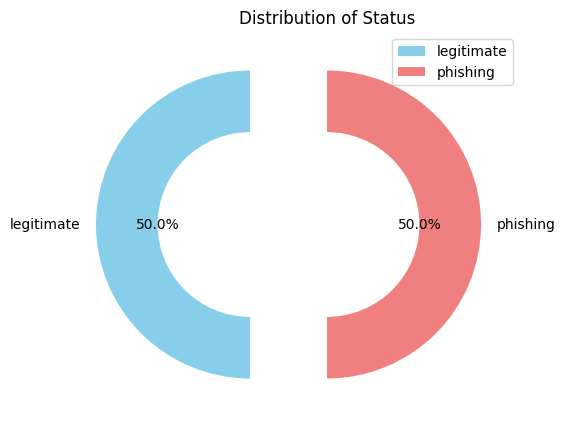

In [8]:
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed


status_counts = df['status'].value_counts()
colors = ['skyblue', 'lightcoral']
explode = (0.5, 0)
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), explode=explode, colors=colors)
plt.title("Distribution of Status")

# Add legend
plt.legend(status_counts.index, loc="best")

plt.show()

In [9]:
# checking unique values and counts from the collected object features
df['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [11]:
tokenizer.tokenize(df.url[0]) # this will fetch all the words from the first URL

['http', 'www', 'crestonwood', 'com', 'router', 'php']

In [12]:
# Tokenizing all the rows 
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.09300880000000156 sec


In [13]:
stemmer = SnowballStemmer("english") # choose a language

In [14]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...


Time taken 2.360532600000001 sec


In [15]:
df.sample(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed
11338,http://forums.androidcentral.com/chromebooks/6...,80,25,0,3,3,0,0,0,0,...,0,1928,4646,2792,0,0,6,legitimate,"[http, forums, androidcentral, com, chromebook...","[http, forum, androidcentr, com, chromebook, f..."
10838,https://www.tumblr.com/safe-mode?url=http%3A%2...,83,14,0,4,4,0,1,0,0,...,0,1047,5161,114,0,1,8,legitimate,"[https, www, tumblr, com, safe, mode, url, htt...","[https, www, tumblr, com, safe, mode, url, htt..."
10917,https://microsoftaccountsecurityportal.wl.r.ap...,79,47,0,5,0,1,0,0,0,...,0,217,5627,0,0,1,5,phishing,"[https, microsoftaccountsecurityportal, wl, r,...","[https, microsoftaccountsecurityport, wl, r, a..."
975,http://clear.verify.clearpointsupplies.com/lil...,61,35,0,4,0,0,0,0,0,...,0,357,1834,0,0,1,0,phishing,"[http, clear, verify, clearpointsupplies, com,...","[http, clear, verifi, clearpointsuppli, com, l..."
10253,https://commons.wikimedia.org/wiki/Category:Im...,57,21,0,2,0,0,0,0,0,...,0,598,6342,294,0,0,5,legitimate,"[https, commons, wikimedia, org, wiki, Categor...","[https, common, wikimedia, org, wiki, categori..."


In [16]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.010698200000000213 sec


In [17]:
bad_sites = df[df.status == 'phishing']
good_sites = df[df.status == 'legitimate']

In [18]:
bad_sites.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,77,5767,0,0,1,2,phishing,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,14,4004,5828815,0,1,0,phishing,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,0,-1,0,0,1,0,phishing,"[http, appleid, apple, com, app, es]","[http, appleid, appl, com, app, es]",http appleid appl com app es
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,76,5767,0,0,1,2,phishing,"[http, www, shadetreetechnology, com, V, valid...","[http, www, shadetreetechnolog, com, v, valid,...",http www shadetreetechnolog com v valid ba b b...
13,http://html.house/l7ceeid6.html,31,10,0,2,0,0,0,0,0,...,66,1761,1173197,0,1,4,phishing,"[http, html, house, l, ceeid, html]","[http, html, hous, l, ceeid, html]",http html hous l ceeid html


In [19]:
good_sites.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,45,-1,0,1,1,4,legitimate,"[http, www, crestonwood, com, router, php]","[http, www, crestonwood, com, router, php]",http www crestonwood com router php
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,62,-1,107721,0,0,3,legitimate,"[http, rgipt, ac, in]","[http, rgipt, ac, in]",http rgipt ac in
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,224,8175,8725,0,0,6,legitimate,"[http, www, iracing, com, tracks, gateway, mot...","[http, www, irac, com, track, gateway, motorsp...",http www irac com track gateway motorsport park
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,170,7529,0,0,0,1,legitimate,"[http, www, mutuo, it]","[http, www, mutuo, it]",http www mutuo it
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,371,7298,0,0,0,5,legitimate,"[http, vamoaestudiarmedicina, blogspot, com]","[http, vamoaestudiarmedicina, blogspot, com]",http vamoaestudiarmedicina blogspot com


In [20]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,45,-1,0,1,1,4,legitimate,"[http, www, crestonwood, com, router, php]","[http, www, crestonwood, com, router, php]",http www crestonwood com router php
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,77,5767,0,0,1,2,phishing,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,14,4004,5828815,0,1,0,phishing,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,62,-1,107721,0,0,3,legitimate,"[http, rgipt, ac, in]","[http, rgipt, ac, in]",http rgipt ac in
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,224,8175,8725,0,0,6,legitimate,"[http, www, iracing, com, tracks, gateway, mot...","[http, www, irac, com, track, gateway, motorsp...",http www irac com track gateway motorsport park


Creating Model



CountVectorizer- Convert a collection of text documents to a matrix of token counts

In [21]:
cv = CountVectorizer()

In [22]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [23]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
joblib.dump(cv, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
trainX, testX, trainY, testY = train_test_split(feature, df.status)

LogisticRegression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()
lr.fit(trainX,trainY)


LogisticRegression()

In [29]:
lr.score(testX,testY)

0.903778866340098

Logistic Regression provide 96% accuracy,Now we will store the score in the dictionary so that we can find which model performs the best.

In [30]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9647690153989734
Testing Accuracy : 0.903778866340098

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.91      0.91      1469
        Good       0.90      0.90      0.90      1389

    accuracy                           0.90      2858
   macro avg       0.90      0.90      0.90      2858
weighted avg       0.90      0.90      0.90      2858


CONFUSION MATRIX


<AxesSubplot:>

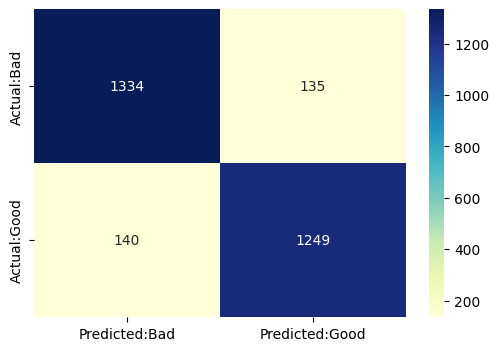

In [31]:
# creating confusing matrix
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300, 400]
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(trainX, trainY)

best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_
test_accuracy = best_lr_model.score(testX, testY)
print("Best Parameters:", best_params)
print("Test Accuracy with Hyperparameter Tuning:", test_accuracy)

MultinomialNB


The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# create mnb object
mnb = MultinomialNB()

In [ ]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [ ]:
mnb.score(testX,testY)

0.903778866340098

MultinomialNBMultinomialNB provide 95% accuracy,so we can store the score in the dictionary

In [ ]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9648856742883808
Testing Accuracy : 0.903778866340098

CLASSIFICATION REPORT



              precision    recall  f1-score   support

         Bad       0.95      0.87      0.91      1551
        Good       0.86      0.95      0.90      1307

    accuracy                           0.90      2858
   macro avg       0.90      0.91      0.90      2858
weighted avg       0.91      0.90      0.90      2858


CONFUSION MATRIX


<AxesSubplot:>

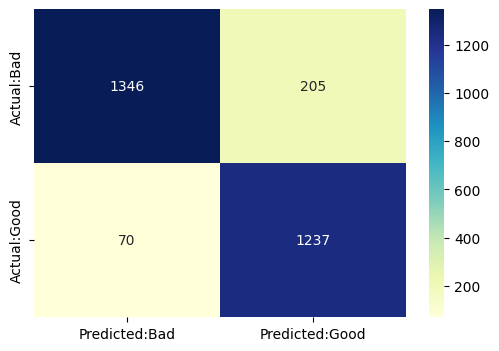

In [ ]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Lets compare the two models and find out which one is best.

(array([0, 1]),
 [Text(0, 0, 'Logistic Regression'), Text(1, 0, 'MultinomialNB')])

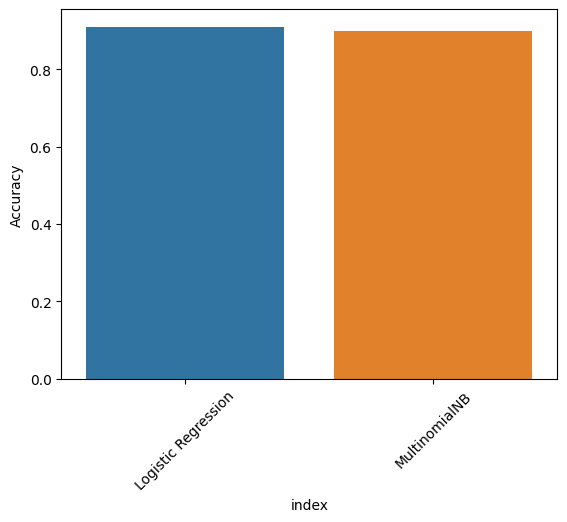

In [ ]:
acc = pd.DataFrame.from_dict(Scores_ml, orient='index', columns=['Accuracy'])

# Reset the index to make 'index' a regular column
acc = acc.reset_index()

# Plot the barplot
sns.barplot(x='index', y='Accuracy', data=acc)

# Optionally, rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

SVM

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.svm import SVC
svm_clf =SVC(C=100, gamma=0.0001, kernel='rbf')
svm_clf.fit(trainX,trainY)
pred=svm_clf.predict(testX)
accuracy_score(pred,testY)

0.834849545136459

Training Accuracy : 0.8499766682221185
Testing Accuracy : 0.834849545136459

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.79      0.87      0.83      1292
        Good       0.88      0.81      0.84      1566

    accuracy                           0.83      2858
   macro avg       0.83      0.84      0.83      2858
weighted avg       0.84      0.83      0.84      2858


CONFUSION MATRIX


<AxesSubplot:>

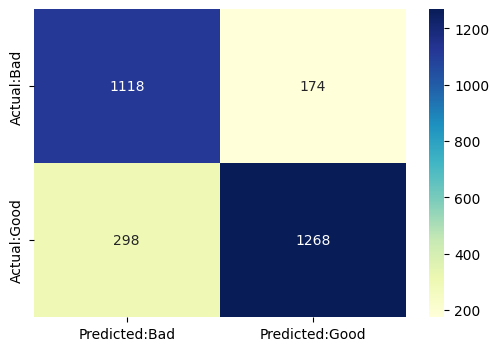

In [ ]:
print('Training Accuracy :',svm_clf.score(trainX,trainY))
print('Testing Accuracy :',svm_clf.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(svm_clf.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(svm_clf.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
forest_clf.fit(trainX,trainY)
ran_pred=forest_clf.predict(testX)
accuracy_score(ran_pred,testY)

0.8219034289713086

Training Accuracy : 0.8181287914139057
Testing Accuracy : 0.8219034289713086

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.75      0.84      1845
        Good       0.67      0.96      0.79      1013

    accuracy                           0.82      2858
   macro avg       0.82      0.85      0.82      2858
weighted avg       0.87      0.82      0.83      2858


CONFUSION MATRIX


<AxesSubplot:>

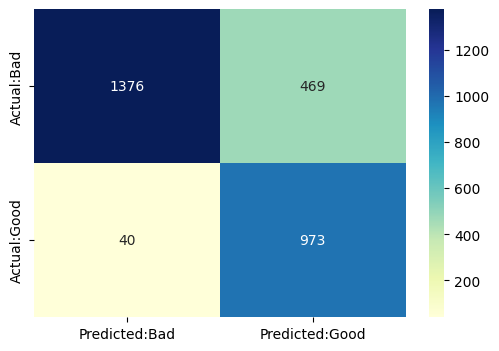

In [ ]:
print('Training Accuracy :',forest_clf.score(trainX,trainY))
print('Testing Accuracy :',forest_clf.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(forest_clf.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(forest_clf.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

DecisionThree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(trainX,trainY)
dtree_predict=dtree.predict(testX)
accuracy_score(dtree_predict,testY)

0.8488453463960812

Training Accuracy : 1.0
Testing Accuracy : 0.8488453463960812

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.78      0.90      0.84      1238
        Good       0.91      0.81      0.86      1620

    accuracy                           0.85      2858
   macro avg       0.85      0.85      0.85      2858
weighted avg       0.86      0.85      0.85      2858


CONFUSION MATRIX


<AxesSubplot:>

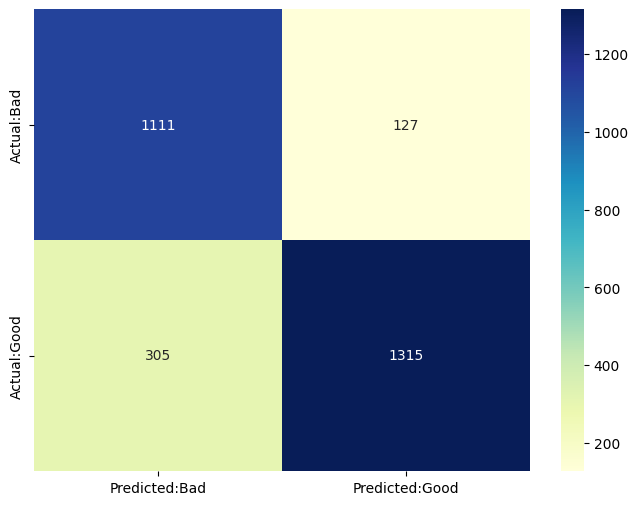

In [ ]:
print('Training Accuracy :',dtree.score(trainX,trainY))
print('Testing Accuracy :',dtree.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(dtree.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(dtree.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (8,6))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

## Export the Model

In [ ]:
import joblib
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
# Load the trained model
lr_model = joblib.load('logistic_regression_model.pkl')

# Function to preprocess the input URL
def preprocess_url(url):
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    words_tokenized = tokenizer.tokenize(url)

    stemmer = SnowballStemmer("english")
    words_stemmed = [stemmer.stem(word) for word in words_tokenized]

    return ' '.join(words_stemmed)

# Function to make predictions
def predict_url_status(url):
    preprocessed_url = preprocess_url(url)
    feature = cv.transform([preprocessed_url])
    prediction = lr_model.predict(feature)[0]

    return prediction

In [ ]:
url_to_predict = "http://batvrms.net/deliver/D2017HL/u.php"
prediction_result = predict_url_status(url_to_predict)

if prediction_result == 'phishing':
    print(f"The URL '{url_to_predict}' is predicted to be a phishing site.")
else:
    print(f"The URL '{url_to_predict}' is predicted to be a legitimate site.")

The URL 'http://batvrms.net/deliver/D2017HL/u.php' is predicted to be a phishing site.
